# Model Building dor Solubility Dataset

Chanin Natasenamat

Data Professor Youtube channel: https://youtube.com/dataprofessor

## Read in data

In [1]:
import pandas as pd 

In [2]:
delaney_with_descriptors_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(delaney_with_descriptors_url)
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [3]:
dataset.isna().sum()

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64

In [4]:
dataset.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


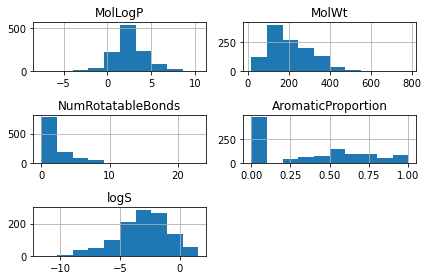

In [6]:
import matplotlib.pyplot as plt 
dataset.hist()
plt.tight_layout()

In [7]:
X = dataset.drop(['logS'], axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [8]:
y = dataset.iloc[:,-1]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

## Linear Regression

In [83]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 

In [84]:
model_l = linear_model.LinearRegression()
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Coeficient of determination (R^2): {r2_score(y_test, y_pred)}')

Mean Squared Error (MSE): 0.9796375771492453
Coeficient of determination (R^2): 0.779985766681349


## Random Forest

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Coeficient of determination (R^2): {r2_score(y_test, y_pred)}')

Mean Squared Error (MSE): 0.6373676500426567
Coeficient of determination (R^2): 0.8568552716461573


## Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Coeficient of determination (R^2): {r2_score(y_test, y_pred)}')

Mean Squared Error (MSE): 0.6095233539385385
Coeficient of determination (R^2): 0.8631087490571322


## Model Performance

In [89]:
print(f'coeficients: {model_l.coef_}')
print(f'Intercept: {model_l.intercept_}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Coeficient of determination (R^2): {r2_score(y_test, y_pred)}')

coeficients: [-0.77513742 -0.00619774 -0.00431862 -0.39651484]
Intercept: 0.24735695399449265
Mean Squared Error (MSE): 0.6095233539385385
Coeficient of determination (R^2): 0.8631087490571322


## Model Equation

In [90]:
print(f'LogS = {model_l.intercept_:.3f} {model_l.coef_[0]:.3f}LogP {model_l.coef_[1]:.3f}MW + {model_l.coef_[2]:.3f}RB {model_l.coef_[3]:.3f}AP')

LogS = 0.247 -0.775LogP -0.006MW + -0.004RB -0.397AP


## Data Visualization (Experimental vs Predicted LogS for Training Data)

In [91]:
import matplotlib.pyplot as plt 
import numpy as np 

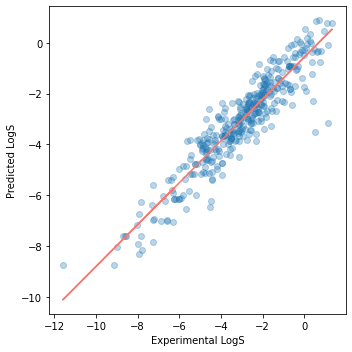

In [92]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_pred, alpha=0.3)

# add a trendline
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

plt.plot(y_test, p(y_test), '#F8766D')
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.tight_layout()

## Save Model as Pickle Object

In [93]:
import pickle 

In [94]:
pickle.dump(model, open('solubility_model.pkl', 'wb'))